In [4]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
from spacy.lang.en.stop_words import STOP_WORDS
import utility_functions as utils
import importlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from fuzzywuzzy import process
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
np.float = float
np.int = int
np.object = object
np.bool = bool

importlib.reload(utils)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
billboard_100_df = pd.read_csv('../Data/billboard/hot-100-current.csv')
billboard_200_df = pd.read_csv('../Data/billboard/billboard-200-current.csv')

In [4]:
# Define artist name or use the mapped version if needed
artist_name = 'n.w.a'

# Filter the DataFrame for 2Pac's songs
tupac_songs = billboard_100_df[billboard_100_df['performer'].str.contains(artist_name, case=False, na=False)]

# Display the results
print(tupac_songs['performer'].value_counts())

performer
Randy Newman                           32
Calvin Harris Featuring John Newman    20
John Newman                            18
Thunderclap Newman                     10
Randy Newman & Paul Simon               8
Troy Newman                             4
N.W.A                                   2
Name: count, dtype: int64


In [5]:
hip_hop_artists = list(set(df['Artist']))
billboard_artists = list(set(billboard_100_df['performer']))

artist_mapping = {}

# Perform fuzzy matching
for artist in hip_hop_artists:
    matches = process.extract(artist, billboard_artists, limit=5)  # Get top 5 matches
    filtered_matches = [match[0] for match in matches if match[1] > 80]
    artist_mapping[artist] = filtered_matches

artist_mapping['Eazy-E'] = ['Eazy-E']
artist_mapping['Dr.Dre'] = ['Dr. Dre']
artist_mapping['De La Soul'] = ['De La Soul', 'De La Soul Featuring Chaka Khan']
artist_mapping['The Notorious B.I.G'] = ['The Notorious B.I.G.']
artist_mapping['Jay-Z'] = ['Jay-Z']
artist_mapping['LL cool J'] = ['LL Cool J']
artist_mapping['Busta Rhymes'] = ['Busta Rhymes']
artist_mapping['Pac'] = ['2Pac + Outlawz', '2Pac']
artist_mapping['Run-DMC'] = ['Run-D.M-C.']
artist_mapping['Gang Starr'] = ['Gang Starr']
artist_mapping['Ice-T'] = ['Ice-T']
artist_mapping['N.W.A'] = ['N.W.A']
artist_mapping['Wu Tang Clan'] = ['Wu-Tang Clan']
artist_mapping['Erik B and Rakim'] = []
artist_mapping['Westside Connection'] = ['Westside Connection', 'Westside Connection Featuring Nate Dogg']
artist_mapping['A Tribe Called Quest'] = ['A Tribe Called Quest']
artist_mapping['Ice Cube'] = ['Ice Cube']
artist_mapping['Too Short'] = ['Too $hort']
artist_mapping['Nas'] = ['Nas']
artist_mapping['Public Enemy'] = ['Public Enemy']
artist_mapping['Big L'] = []
artist_mapping['Cypress Hill'] = ['Cypress Hill']
artist_mapping['Digital Underground'] = ['Digital Underground']
artist_mapping['Beastie Boys'] = ['Beastie Boys']
artist_mapping['Souls Of Mischief'] = ['Souls Of Mischief']
artist_mapping['The Pharcyde'] = ['The Pharcyde']
artist_mapping['Coolio'] = ['Coolio', 'Coolio Featuring L.V.']
artist_mapping['Snoop Dogg'] = ['Snoop Dogg']
artist_mapping['Mobb Deep'] = ['Mobb Deep']
artist_mapping['Warren G'] = ['Warren G']

In [6]:
artist_mapping

{'Beastie Boys': ['Beastie Boys'],
 'Mobb Deep': ['Mobb Deep'],
 'Busta Rhymes': ['Busta Rhymes'],
 'LL cool J': ['LL Cool J'],
 'Too Short': ['Too $hort'],
 'Ice-T': ['Ice-T'],
 'Snoop Dogg': ['Snoop Dogg'],
 'Westside Connection': ['Westside Connection',
  'Westside Connection Featuring Nate Dogg'],
 'Ice Cube': ['Ice Cube'],
 'The Pharcyde': ['The Pharcyde'],
 'De La Soul': ['De La Soul', 'De La Soul Featuring Chaka Khan'],
 'Big L': [],
 'Pac': ['2Pac + Outlawz', '2Pac'],
 'Cypress Hill': ['Cypress Hill'],
 'Eazy-E': ['Eazy-E'],
 'Erik B and Rakim': [],
 'Run-DMC': ['Run-D.M-C.'],
 'Jay-Z': ['Jay-Z'],
 'Nas': ['Nas'],
 'Warren G': ['Warren G'],
 'Digital Underground': ['Digital Underground'],
 'Public Enemy': ['Public Enemy'],
 'The Notorious B.I.G': ['The Notorious B.I.G.'],
 'Coolio': ['Coolio', 'Coolio Featuring L.V.'],
 'Gang Starr': ['Gang Starr'],
 'A Tribe Called Quest': ['A Tribe Called Quest'],
 'N.W.A': ['N.W.A'],
 'Wu Tang Clan': ['Wu-Tang Clan'],
 'Dr.Dre': ['Dr. Dre'],

In [8]:
billboard_100_df['chart_week'] = pd.to_datetime(billboard_100_df['chart_week'])

# Filter rows where the year is between 1986 and 1998 (inclusive)
billboard_100_df_86_98 = billboard_100_df[(billboard_100_df['chart_week'].dt.year >= 1986) &
                                          (billboard_100_df['chart_week'].dt.year <= 1998)]

In [9]:
mapped_artists = []
for artists in artist_mapping.values():
    mapped_artists.extend(artists)
mapped_artists = list(set(mapped_artists))
filtered_billboard_df = billboard_100_df_86_98[billboard_100_df_86_98['performer'].isin(mapped_artists)]

In [10]:
filtered_billboard_df

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
161585,1986-12-20,86,(You Gotta) Fight For Your Right (To Party!),Beastie Boys,NaN,86,1
161667,1986-12-27,68,(You Gotta) Fight For Your Right (To Party!),Beastie Boys,86.0,68,2
161767,1987-01-03,68,(You Gotta) Fight For Your Right (To Party!),Beastie Boys,68.0,68,3
161862,1987-01-10,63,(You Gotta) Fight For Your Right (To Party!),Beastie Boys,68.0,63,4
161951,1987-01-17,52,(You Gotta) Fight For Your Right (To Party!),Beastie Boys,63.0,52,5
...,...,...,...,...,...,...,...
223876,1998-11-28,77,Dr. Greenthumb,Cypress Hill,79.0,70,11
223967,1998-12-05,68,Changes,2Pac,NaN,68,1
224054,1998-12-12,55,Changes,2Pac,68.0,55,2
224142,1998-12-19,43,Changes,2Pac,55.0,43,3


In [11]:
east_coast_artists = list(set(df[df['Coast'] == 'east_coast']['Artist']))
west_coast_artists = list(set(df[df['Coast'] == 'west_coast']['Artist']))

FileNotFoundError: [Errno 2] No such file or directory: './Plots/number_of_songs_charted_over_time_per_coast_billboard.png'

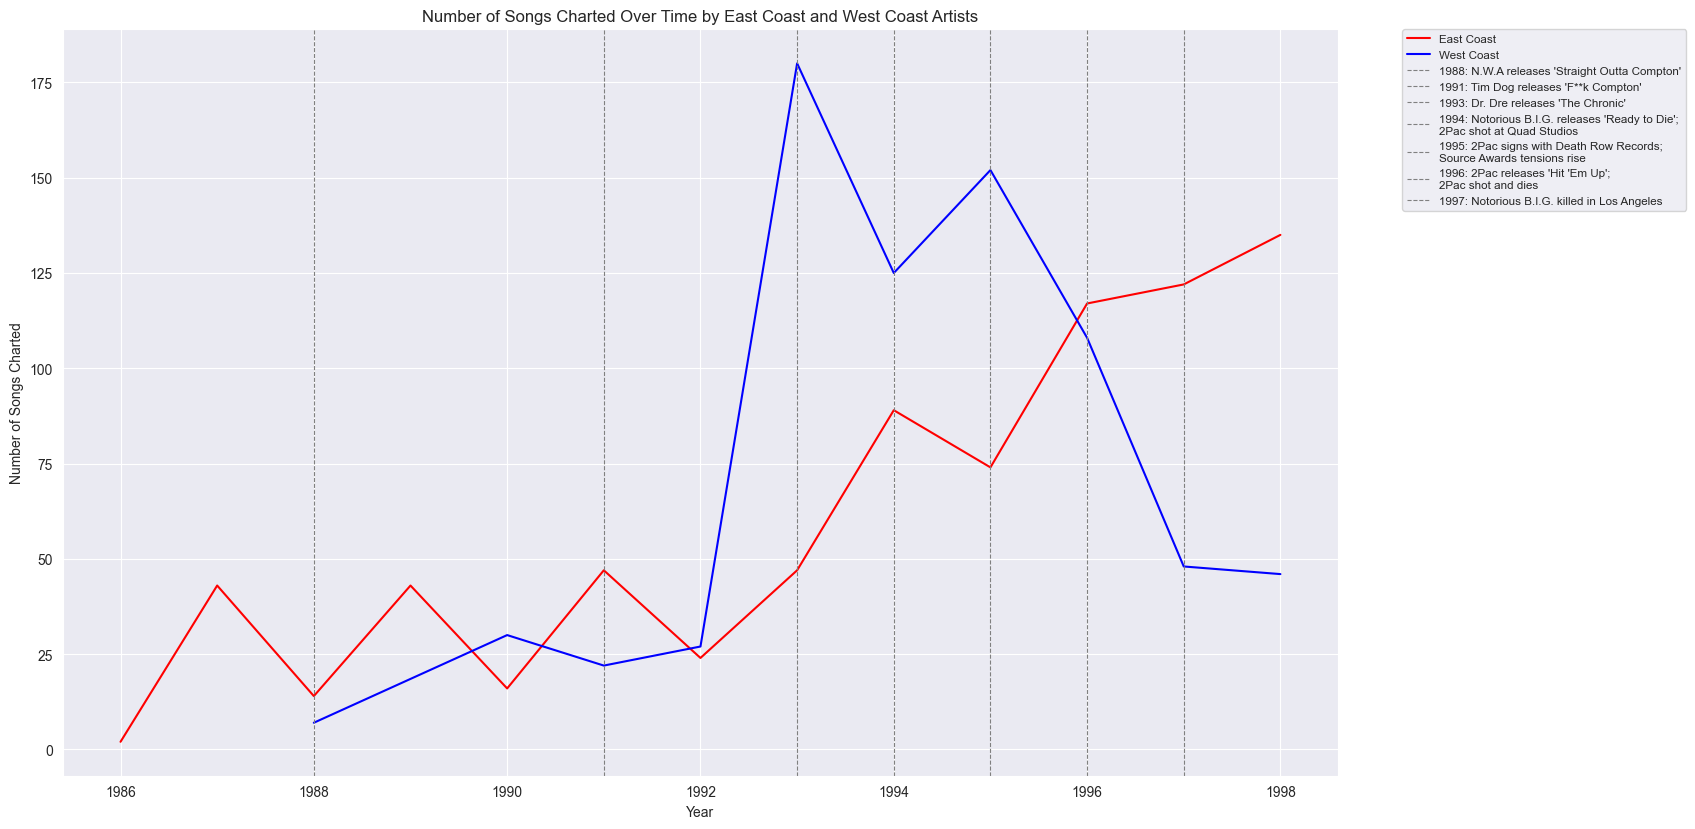

In [12]:
# Prepare data for east and west coast artists
east_mapped_artists = list(set(artist for artist in east_coast_artists if artist_mapping.get(artist)))
east_billboard_artists = [mapped for artist in east_mapped_artists for mapped in artist_mapping[artist]]
west_mapped_artists = list(set(artist for artist in west_coast_artists if artist_mapping.get(artist)))
west_billboard_artists = [mapped for artist in west_mapped_artists for mapped in artist_mapping[artist]]

# Filter data for each coast
filtered_east = filtered_billboard_df[filtered_billboard_df['performer'].isin(east_billboard_artists)].copy()
filtered_west = filtered_billboard_df[filtered_billboard_df['performer'].isin(west_billboard_artists)].copy()

# Group by year and count the number of songs on the chart
filtered_east.loc[:, 'year'] = pd.to_datetime(filtered_east['chart_week']).dt.year
filtered_west.loc[:, 'year'] = pd.to_datetime(filtered_west['chart_week']).dt.year

east_counts = filtered_east.groupby('year').size().reset_index(name='Count')
west_counts = filtered_west.groupby('year').size().reset_index(name='Count')
# east_counts['label'] = 'east_coast'
# west_counts['label'] = 'west_coast'

# combined_counts = pd.concat([east_counts, west_counts])
# combined_counts.to_csv('./combined_counts.csv')

plt.figure(figsize=(20, 8))  # Adjusted the figure width to make more space for the legend
plt.plot(east_counts['year'], east_counts['Count'], color='red', label='East Coast')
plt.plot(west_counts['year'], west_counts['Count'], color='blue', label='West Coast')

# Define the events with years and descriptions
events = {
    1988: "N.W.A releases 'Straight Outta Compton'",
    1991: "Tim Dog releases 'F**k Compton'",
    1993: "Dr. Dre releases 'The Chronic'",
    1994: "Notorious B.I.G. releases 'Ready to Die';\n2Pac shot at Quad Studios",
    1995: "2Pac signs with Death Row Records;\nSource Awards tensions rise",
    1996: "2Pac releases 'Hit 'Em Up';\n2Pac shot and dies",
    1997: "Notorious B.I.G. killed in Los Angeles"
}

# Plot vertical lines for each event with descriptions as labels
for year, description in events.items():
    plt.axvline(x=year, color='grey', linestyle='--', linewidth=0.8, label=f"{year}: {description}")

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))

# Adjust legend position outside of the plot box
plt.legend(unique.values(), unique.keys(), loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small', borderaxespad=0)

# Adjust the plot area to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust right boundary to make space for the legend


# Labels and title
plt.xlabel('Year')
plt.ylabel('Number of Songs Charted')
plt.title('Number of Songs Charted Over Time by East Coast and West Coast Artists')
plt.savefig('./Plots/number_of_songs_charted_over_time_per_coast_billboard.png', bbox_inches='tight')

plt.show()


In [1]:
# Create figure with a larger size and better proportions
plt.figure(figsize=(15, 10))

# Plot the main lines with increased line width for better visibility
plt.plot(east_counts['year'], east_counts['Count'], color='red', label='East Coast', linewidth=2.5)
plt.plot(west_counts['year'], west_counts['Count'], color='blue', label='West Coast', linewidth=2.5)

# Add a light grid for better readability
plt.grid(True, linestyle='--', alpha=0.3)

# Plot vertical lines for each event with descriptions
for year, description in events.items():
    plt.axvline(x=year, color='grey', linestyle='--', linewidth=1, alpha=0.7)
    # Add text annotation for each event
    plt.text(year, plt.ylim()[1] * 0.95, f'• {year}', 
             rotation=90, verticalalignment='bottom', 
             horizontalalignment='center', fontsize=9)

# Create a separate text box for events
event_text = '\n'.join([f"{year}: {desc}" for year, desc in events.items()])
plt.figtext(0.98, 0.5, 'Key Events:\n' + event_text, 
            fontsize=9, ha='right', va='center', 
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='grey', boxstyle='round,pad=0.5'))

# Improve the overall appearance
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Number of Songs Charted', fontsize=12, labelpad=10)
plt.title('East Coast vs West Coast Billboard Chart Presence (1988-1997)', 
          fontsize=14, pad=20)

# Add legend for the coast lines
plt.legend(loc='upper left', frameon=True, framealpha=0.9)

# Adjust layout to prevent text cutoff
plt.tight_layout()

# Save the plot with high DPI for better quality
plt.savefig('./Plots/number_of_songs_charted_over_time_per_coast_billboard.png', 
            bbox_inches='tight', dpi=300)

plt.show()

NameError: name 'plt' is not defined